In [2]:
import os
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

In [3]:
#load tables with stacked y_pred
df1 = pd.read_csv('/media/DataD800/Alina/retest_set/MLtables/output_CogTotalComp_Unadj/3level_retest1_y_pred_stacked.csv', index_col=0)
df2 = pd.read_csv('/media/DataD800/Alina/retest_set/MLtables/output_CogTotalComp_Unadj/3level_retest2_y_pred_stacked.csv', index_col=0)

/home/narunlab/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [4]:
#check they have same subjects and its number
ind = sorted(set(df1.index) & set(df2.index))
df1 = df1.reindex(index=ind)
df2 = df2.reindex(index=ind)

In [5]:
#create tables for pingouin format
df_comp_s1 = pd.DataFrame({'subj': np.append(df1.index, df2.index),
                          'trial': np.append(np.full(len(df1.index), 1), np.full(len(df2.index), 2)),
                          'scores': np.array(pd.concat([df1['set1'], df2['set1']], axis=0))})
df_comp_s2 = pd.DataFrame({'subj': np.append(df1.index, df2.index),
                          'trial': np.append(np.full(len(df1.index), 1), np.full(len(df2.index), 2)),
                          'scores': np.array(pd.concat([df1['set2'], df2['set2']], axis=0))})
df_comp_s3 = pd.DataFrame({'subj': np.append(df1.index, df2.index),
                          'trial': np.append(np.full(len(df1.index), 1), np.full(len(df2.index), 2)),
                          'scores': np.array(pd.concat([df1['set3'], df2['set3']], axis=0))})

In [6]:
icc_table_s1 = pg.intraclass_corr(data = df_comp_s1, targets='subj', raters='trial', ratings='scores')
print('All Modalities Stacked Model ICC')
display(icc_table_s1)

All Modalities Stacked Model ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.769706,7.684554,33,34,2.254533e-08,"[0.59, 0.88]"
1,ICC2,Single random raters,0.768900,7.458548,33,33,4.775993e-08,"[0.58, 0.88]"
2,ICC3,Single fixed raters,0.763553,7.458548,33,33,4.775993e-08,"[0.58, 0.87]"
3,ICC1k,Average raters absolute,0.869869,7.684554,33,34,2.254533e-08,"[0.74, 0.93]"
4,ICC2k,Average random raters,0.869354,7.458548,33,33,4.775993e-08,"[0.74, 0.93]"
5,ICC3k,Average fixed raters,0.865926,7.458548,33,33,4.775993e-08,"[0.73, 0.93]"


In [7]:
icc_table_s2 = pg.intraclass_corr(data = df_comp_s2, targets='subj', raters='trial', ratings='scores')
print('Task Stacked Model ICC')
display(icc_table_s2)

Task Stacked Model ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.795995,8.803702,33,34,3.598000e-09,"[0.63, 0.89]"
1,ICC2,Single random raters,0.795364,8.545209,33,33,8.087251e-09,"[0.63, 0.89]"
2,ICC3,Single fixed raters,0.790471,8.545209,33,33,8.087251e-09,"[0.62, 0.89]"
3,ICC1k,Average raters absolute,0.886411,8.803702,33,34,3.598000e-09,"[0.77, 0.94]"
4,ICC2k,Average random raters,0.886020,8.545209,33,33,8.087251e-09,"[0.77, 0.94]"
5,ICC3k,Average fixed raters,0.882975,8.545209,33,33,8.087251e-09,"[0.77, 0.94]"


In [8]:
icc_table_s3 = pg.intraclass_corr(data = df_comp_s3, targets='subj', raters='trial', ratings='scores')
print('Non-Task Stacked Model ICC')
display(icc_table_s3)

Non-Task Stacked Model ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.668502,5.033221,33,34,0.000005,"[0.43, 0.82]"
1,ICC2,Single random raters,0.666849,4.886945,33,33,0.000008,"[0.43, 0.82]"
2,ICC3,Single fixed raters,0.660265,4.886945,33,33,0.000008,"[0.42, 0.81]"
3,ICC1k,Average raters absolute,0.801320,5.033221,33,34,0.000005,"[0.6, 0.9]"
4,ICC2k,Average random raters,0.800131,4.886945,33,33,0.000008,"[0.6, 0.9]"
5,ICC3k,Average fixed raters,0.795373,4.886945,33,33,0.000008,"[0.59, 0.9]"


In [9]:
print('ICC3 for stacked models')
dff = pd.DataFrame({'all mods': icc_table_s1.iloc[2,2:],
             'tasks':icc_table_s2.iloc[2,2:],
             'non_tasks':icc_table_s3.iloc[2,2:]})
display(dff)

ICC3 for stacked models


,all mods,tasks,non_tasks
ICC,0.763553,0.790471,0.660265
F,7.458548,8.545209,4.886945
df1,33,33,33
df2,33,33,33
pval,0.0,0.0,0.000008
CI95%,"[0.58, 0.87]","[0.62, 0.89]","[0.42, 0.81]"


In [10]:
#load tables with single modality y-predicted
df3 = pd.read_csv('/media/DataD800/Alina/retest_set/MLtables/output_CogTotalComp_Unadj/3level_retest1_y_pred_singleML.csv', index_col=0)
df4 = pd.read_csv('/media/DataD800/Alina/retest_set/MLtables/output_CogTotalComp_Unadj/3level_retest2_y_pred_singleML.csv', index_col=0)

In [11]:
#check they have same subjects and its number
ind = sorted(set(df3.index) & set(df4.index))
df3 = df3.reindex(index=ind)
df4 = df4.reindex(index=ind)

In [12]:
dct_tab_mod =  {}
for col in df3.columns:
    dct_tab_mod[col] = pd.DataFrame({'subj': np.append(df3.index, df4.index),
                          'trial': np.append(np.full(len(df3.index), 1), np.full(len(df4.index), 2)),
                          'scores': np.array(pd.concat([df3[col], df4[col]], axis=0))})

In [13]:
dct_tab_mod_icc={}
for key in dct_tab_mod.keys():
    dct_tab_mod_icc[key] = pg.intraclass_corr(data = dct_tab_mod[key], targets='subj', raters='trial', ratings='scores')
    print(key, 'modality ICC')
    display(dct_tab_mod_icc[key])

emo modality ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.299766,1.856187,33,34,0.038606,"[-0.03, 0.57]"
1,ICC2,Single random raters,0.292331,1.802110,33,33,0.047749,"[-0.05, 0.57]"
2,ICC3,Single fixed raters,0.286252,1.802110,33,33,0.047749,"[-0.05, 0.57]"
3,ICC1k,Average raters absolute,0.461261,1.856187,33,34,0.038606,"[-0.07, 0.73]"
4,ICC2k,Average random raters,0.452409,1.802110,33,33,0.047749,"[-0.11, 0.73]"
5,ICC3k,Average fixed raters,0.445095,1.802110,33,33,0.047749,"[-0.11, 0.72]"


gam modality ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,-0.147374,0.743111,33,34,0.802022,"[-0.46, 0.19]"
1,ICC2,Single random raters,-0.167558,0.721373,33,33,0.823547,"[-0.49, 0.19]"
2,ICC3,Single fixed raters,-0.161863,0.721373,33,33,0.823547,"[-0.47, 0.18]"
3,ICC1k,Average raters absolute,-0.345694,0.743111,33,34,0.802022,"[-1.68, 0.33]"
4,ICC2k,Average random raters,-0.402571,0.721373,33,33,0.823547,"[-1.93, 0.31]"
5,ICC3k,Average fixed raters,-0.386246,0.721373,33,33,0.823547,"[-1.78, 0.31]"


lan modality ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.760991,7.367876,33,34,3.931693e-08,"[0.57, 0.87]"
1,ICC2,Single random raters,0.760144,7.156486,33,33,8.100847e-08,"[0.57, 0.87]"
2,ICC3,Single fixed raters,0.754796,7.156486,33,33,8.100847e-08,"[0.56, 0.87]"
3,ICC1k,Average raters absolute,0.864276,7.367876,33,34,3.931693e-08,"[0.73, 0.93]"
4,ICC2k,Average random raters,0.863729,7.156486,33,33,8.100847e-08,"[0.73, 0.93]"
5,ICC3k,Average fixed raters,0.860267,7.156486,33,33,8.100847e-08,"[0.72, 0.93]"


mot modality ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.327852,1.975535,33,34,0.026062,"[-0.0, 0.6]"
1,ICC2,Single random raters,0.321082,1.918608,33,33,0.032772,"[-0.02, 0.59]"
2,ICC3,Single fixed raters,0.314742,1.918608,33,33,0.032772,"[-0.02, 0.59]"
3,ICC1k,Average raters absolute,0.493808,1.975535,33,34,0.026062,"[-0.01, 0.75]"
4,ICC2k,Average random raters,0.486090,1.918608,33,33,0.032772,"[-0.04, 0.75]"
5,ICC3k,Average fixed raters,0.478789,1.918608,33,33,0.032772,"[-0.04, 0.74]"


rel modality ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.568471,3.634681,33,34,0.000158,"[0.29, 0.76]"
1,ICC2,Single random raters,0.565672,3.529279,33,33,0.000245,"[0.28, 0.76]"
2,ICC3,Single fixed raters,0.558429,3.529279,33,33,0.000245,"[0.28, 0.75]"
3,ICC1k,Average raters absolute,0.724873,3.634681,33,34,0.000158,"[0.45, 0.86]"
4,ICC2k,Average random raters,0.722593,3.529279,33,33,0.000245,"[0.44, 0.86]"
5,ICC3k,Average fixed raters,0.716656,3.529279,33,33,0.000245,"[0.43, 0.86]"


soc modality ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.479882,2.845279,33,34,0.001598,"[0.18, 0.7]"
1,ICC2,Single random raters,0.475825,2.763058,33,33,0.002265,"[0.16, 0.7]"
2,ICC3,Single fixed raters,0.468517,2.763058,33,33,0.002265,"[0.16, 0.69]"
3,ICC1k,Average raters absolute,0.648541,2.845279,33,34,0.001598,"[0.3, 0.82]"
4,ICC2k,Average random raters,0.644826,2.763058,33,33,0.002265,"[0.28, 0.82]"
5,ICC3k,Average fixed raters,0.638082,2.763058,33,33,0.002265,"[0.28, 0.82]"


wm modality ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.650588,4.723895,33,34,0.000009,"[0.41, 0.81]"
1,ICC2,Single random raters,0.648733,4.585329,33,33,0.000016,"[0.4, 0.81]"
2,ICC3,Single fixed raters,0.641919,4.585329,33,33,0.000016,"[0.39, 0.8]"
3,ICC1k,Average raters absolute,0.788310,4.723895,33,34,0.000009,"[0.58, 0.89]"
4,ICC2k,Average random raters,0.786947,4.585329,33,33,0.000016,"[0.57, 0.89]"
5,ICC3k,Average fixed raters,0.781913,4.585329,33,33,0.000016,"[0.56, 0.89]"


cort modality ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.944161,34.817391,33,34,3.318798e-18,"[0.89, 0.97]"
1,ICC2,Single random raters,0.944159,34.771177,33,33,9.106733e-18,"[0.89, 0.97]"
2,ICC3,Single fixed raters,0.944089,34.771177,33,33,9.106733e-18,"[0.89, 0.97]"
3,ICC1k,Average raters absolute,0.971279,34.817391,33,34,3.318798e-18,"[0.94, 0.99]"
4,ICC2k,Average random raters,0.971278,34.771177,33,33,9.106733e-18,"[0.94, 0.99]"
5,ICC3k,Average fixed raters,0.971241,34.771177,33,33,9.106733e-18,"[0.94, 0.99]"


subc modality ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.940047,32.359390,33,34,1.075445e-17,"[0.88, 0.97]"
1,ICC2,Single random raters,0.939992,31.409382,33,33,4.443148e-17,"[0.88, 0.97]"
2,ICC3,Single fixed raters,0.938289,31.409382,33,33,4.443148e-17,"[0.88, 0.97]"
3,ICC1k,Average raters absolute,0.969097,32.359390,33,34,1.075445e-17,"[0.94, 0.98]"
4,ICC2k,Average random raters,0.969068,31.409382,33,33,4.443148e-17,"[0.94, 0.98]"
5,ICC3k,Average fixed raters,0.968162,31.409382,33,33,4.443148e-17,"[0.94, 0.98]"


surf modality ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.978846,93.545813,33,34,2.978970e-25,"[0.96, 0.99]"
1,ICC2,Single random raters,0.978847,94.056614,33,33,1.171002e-24,"[0.96, 0.99]"
2,ICC3,Single fixed raters,0.978960,94.056614,33,33,1.171002e-24,"[0.96, 0.99]"
3,ICC1k,Average raters absolute,0.989310,93.545813,33,34,2.978970e-25,"[0.98, 0.99]"
4,ICC2k,Average random raters,0.989311,94.056614,33,33,1.171002e-24,"[0.98, 0.99]"
5,ICC3k,Average fixed raters,0.989368,94.056614,33,33,1.171002e-24,"[0.98, 0.99]"


rest modality ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.466862,2.751374,33,34,0.002137,"[0.16, 0.69]"
1,ICC2,Single random raters,0.462520,2.670451,33,33,0.003007,"[0.15, 0.69]"
2,ICC3,Single fixed raters,0.455108,2.670451,33,33,0.003007,"[0.14, 0.68]"
3,ICC1k,Average raters absolute,0.636545,2.751374,33,34,0.002137,"[0.28, 0.82]"
4,ICC2k,Average random raters,0.632498,2.670451,33,33,0.003007,"[0.26, 0.82]"
5,ICC3k,Average fixed raters,0.625531,2.670451,33,33,0.003007,"[0.25, 0.81]"


VolBrain modality ICC


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.994131,339.746956,33,34,1.150018e-34,"[0.99, 1.0]"
1,ICC2,Single random raters,0.994131,347.652118,33,33,6.377532e-34,"[0.99, 1.0]"
2,ICC3,Single fixed raters,0.994264,347.652118,33,33,6.377532e-34,"[0.99, 1.0]"
3,ICC1k,Average raters absolute,0.997057,339.746956,33,34,1.150018e-34,"[0.99, 1.0]"
4,ICC2k,Average random raters,0.997057,347.652118,33,33,6.377532e-34,"[0.99, 1.0]"
5,ICC3k,Average fixed raters,0.997124,347.652118,33,33,6.377532e-34,"[0.99, 1.0]"


In [14]:
ff = pd.DataFrame()
for key in dct_tab_mod_icc.keys():
    ff[key] = dct_tab_mod_icc[key].iloc[2,2:]
    
print('ICC3 for single modality models')
display(ff.T.sort_values(by=['ICC'], ascending=False).T)

ICC3 for single modality models


,VolBrain,surf,cort,subc,lan,wm,rel,soc,rest,mot,emo,gam
ICC,0.994264,0.97896,0.944089,0.938289,0.754796,0.641919,0.558429,0.468517,0.455108,0.314742,0.286252,-0.161863
F,347.652118,94.056614,34.771177,31.409382,7.156486,4.585329,3.529279,2.763058,2.670451,1.918608,1.80211,0.721373
df1,33,33,33,33,33,33,33,33,33,33,33,33
df2,33,33,33,33,33,33,33,33,33,33,33,33
pval,0.0,0.0,0.0,0.0,0.0,0.000016,0.000245,0.002265,0.003007,0.032772,0.047749,0.823547
CI95%,"[0.99, 1.0]","[0.96, 0.99]","[0.89, 0.97]","[0.88, 0.97]","[0.56, 0.87]","[0.39, 0.8]","[0.28, 0.75]","[0.16, 0.69]","[0.14, 0.68]","[-0.02, 0.59]","[-0.05, 0.57]","[-0.47, 0.18]"


In [16]:
df_all_icc3 = pd.concat([dff, ff], axis=1)
display(df_all_icc3.T.sort_values(by=['ICC'], ascending=False).T)

,VolBrain,surf,cort,subc,tasks,all mods,lan,non_tasks,wm,rel,soc,rest,mot,emo,gam
ICC,0.994264,0.97896,0.944089,0.938289,0.790471,0.763553,0.754796,0.660265,0.641919,0.558429,0.468517,0.455108,0.314742,0.286252,-0.161863
F,347.652118,94.056614,34.771177,31.409382,8.545209,7.458548,7.156486,4.886945,4.585329,3.529279,2.763058,2.670451,1.918608,1.80211,0.721373
df1,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
df2,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
pval,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000008,0.000016,0.000245,0.002265,0.003007,0.032772,0.047749,0.823547
CI95%,"[0.99, 1.0]","[0.96, 0.99]","[0.89, 0.97]","[0.88, 0.97]","[0.62, 0.89]","[0.58, 0.87]","[0.56, 0.87]","[0.42, 0.81]","[0.39, 0.8]","[0.28, 0.75]","[0.16, 0.69]","[0.14, 0.68]","[-0.02, 0.59]","[-0.05, 0.57]","[-0.47, 0.18]"


In [17]:
d1 = pd.DataFrame()
for key in dct_tab_mod_icc.keys():
    d1[key] = dct_tab_mod_icc[key].iloc[1,2:]
d2 = pd.DataFrame({'all mods': icc_table_s1.iloc[1,2:],
             'tasks':icc_table_s2.iloc[1,2:],
             'non_tasks':icc_table_s3.iloc[1,2:]})
df_all_icc2 = pd.concat([d2, d1], axis=1)

In [116]:
#full label
lblY = ['All Modalities, Stacked',
'Tasks, Stacked', 
'Non-Task, Stacked',
'Emotional Task',
'Gambling Task',
'Language Task',
'Motor Task', 
'Relational Task',
'Social Task', 
'Working Memory Task',
'Cortical Thickness',
'Subcortical Volume',
'Surface Area', 
'Resting-State FC', 
'Total Brain Volume']

In [117]:
df_plot = pd.DataFrame({'ICC2':df_all_icc2.iloc[0,:],
                      'ICC3':df_all_icc3.iloc[0,:],
                      'CI2':df_all_icc2.iloc[5,:],
                      'CI3':df_all_icc3.iloc[5,:]})
df_plot.index = lblY
display(df_plot)

,ICC2,ICC3,CI2,CI3
"All Modalities, Stacked",0.7689,0.763553,"[0.58, 0.88]","[0.58, 0.87]"
"Tasks, Stacked",0.795364,0.790471,"[0.63, 0.89]","[0.62, 0.89]"
"Non-Task, Stacked",0.666849,0.660265,"[0.43, 0.82]","[0.42, 0.81]"
Emotional Task,0.292331,0.286252,"[-0.05, 0.57]","[-0.05, 0.57]"
Gambling Task,-0.167558,-0.161863,"[-0.49, 0.19]","[-0.47, 0.18]"
Language Task,0.760144,0.754796,"[0.57, 0.87]","[0.56, 0.87]"
Motor Task,0.321082,0.314742,"[-0.02, 0.59]","[-0.02, 0.59]"
Relational Task,0.565672,0.558429,"[0.28, 0.76]","[0.28, 0.75]"
Social Task,0.475825,0.468517,"[0.16, 0.7]","[0.16, 0.69]"
Working Memory Task,0.648733,0.641919,"[0.4, 0.81]","[0.39, 0.8]"


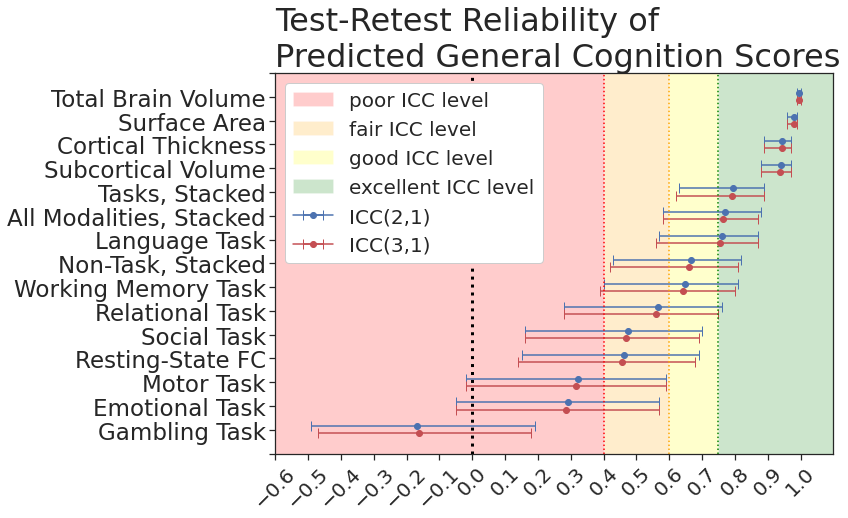

In [118]:
sns.set_color_codes()
fig, ax = plt.subplots(figsize=(10,7))
#plt.figure(figsize=(10,7))
sns.set_style("ticks")
for i in range(len(df_plot.index)):
    y = df_plot.sort_values(by="ICC2", ascending=False).index[i]
    x = df_plot.loc[y,'ICC2']
    xerr = abs(df_plot.loc[y,'CI2'].reshape(2,1) - x)
    #plt.errorbar(x=x, y=(len(df_plot.index)-i)+0.15, xerr=xerr, marker='o',capsize=5, color='blue', label="ICC2")
    if i==0:
        fig = plt.errorbar(x=x, y=(len(df_plot.index)-i)+0.15, xerr=xerr, marker='o',capsize=5, color='b', label="ICC(2,1)")
    else:
        fig = plt.errorbar(x=x, y=(len(df_plot.index)-i)+0.15, xerr=xerr, marker='o',capsize=5, color='b')
    
for i in range(len(df_plot.index)):
    y = df_plot.sort_values(by="ICC3", ascending=False).index[i]
    x = df_plot.loc[y,'ICC3']
    xerr = abs(df_plot.loc[y,'CI3'].reshape(2,1) - x)
    #plt.errorbar(x=x, y=(len(df_plot.index)-i)-0.15, xerr=xerr, marker='o',capsize=5, color='red', label="ICC3") 
    if i==0:
        fig = plt.errorbar(x=x, y=(len(df_plot.index)-i)-0.15, xerr=xerr, marker='o',capsize=5, color='r', label="ICC(3,1)")
    else:
        fig = plt.errorbar(x=x, y=(len(df_plot.index)-i)-0.15, xerr=xerr, marker='o',capsize=5, color='r')

plt.axvline(x=0.75, ymax=16, c='green', linestyle=':')
plt.axvline(x=0.6, ymax=16, c='orange', linestyle=':')
plt.axvline(x=0.4, ymax=16, c='red', linestyle=':')
plt.axvline(x=0, ymax=16, c='black', linestyle=':', linewidth=3)

ax.margins(0)
ax.axvspan(xmin=-0.6, xmax = 0.4, ymax=16, facecolor='red', alpha=0.2, label='poor ICC level')
ax.axvspan(xmin=0.4, xmax = 0.6, ymax=16, facecolor='orange', alpha=0.2, label='fair ICC level')
ax.axvspan(xmin=0.6, xmax = 0.75, ymax=16, facecolor='yellow', alpha=0.2,label='good ICC level')
ax.axvspan(xmin=0.75, xmax = 1.1, ymax=16, facecolor='green', alpha=0.2,label='excellent ICC level')

plt.xticks(np.arange(-0.6, 1.1, 0.1).round(2).tolist(), fontsize=20, rotation=45)
plt.yticks(range(0,17,1), 
           np.append(np.append(np.array([' ']), np.array(df_plot.sort_values(by="ICC2", ascending=True).index)), np.array([' '])), 
           fontsize=23)
plt.legend(fontsize=20,loc='upper left', framealpha=1)
plt.title('Test-Retest Reliability of\nPredicted General Cognition Scores', 
          fontsize=32, loc='left')
plt.show()